In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
data_url = "https://raw.githubusercontent.com/LabeebVK/Python_ICTAK/main/Wine_clust%20.csv"
df = pd.read_csv(data_url)

In [3]:
print(df.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

In [4]:
X = df.values

In [7]:
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

In [8]:
agg_scores = []
for k in k_values:
    agg = AgglomerativeClustering(n_clusters=k)
    labels = agg.fit_predict(X)
    agg_scores.append(silhouette_score(X, labels))

In [16]:
optimal_k_kmeans = k_values[np.argmax(silhouette_scores)]
print("Optimal number of clusters (K-means):", optimal_k_kmeans)

optimal_k_agg = k_values[np.argmax(agg_scores)]
print("Optimal number of clusters (Agglomerative):", optimal_k_agg)

Optimal number of clusters (K-means): 2
Optimal number of clusters (Agglomerative): 2


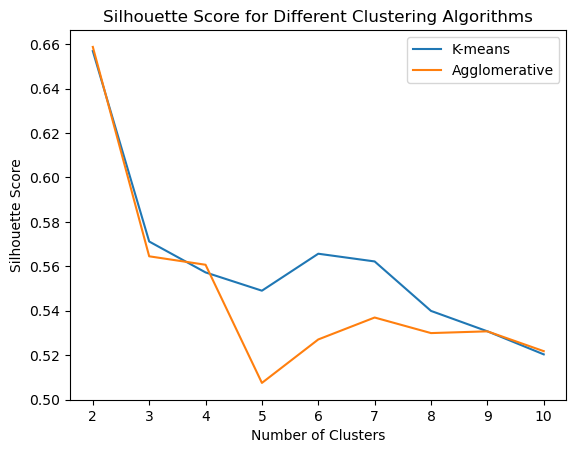

In [17]:
plt.plot(k_values, silhouette_scores, label="K-means")
plt.plot(k_values, agg_scores, label="Agglomerative")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Clustering Algorithms")
plt.legend()
plt.show()

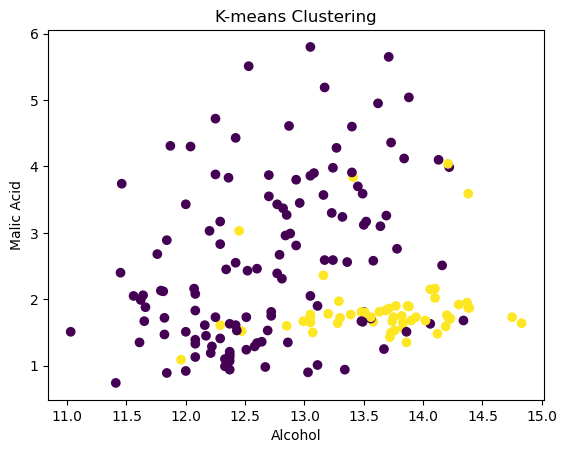

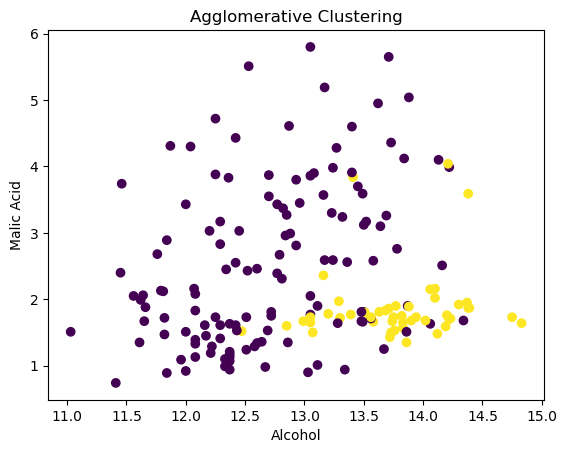

In [21]:
df['KMeans_Cluster'] = kmeans_labels
df['Agg_Cluster'] = agg_labels

plt.scatter(df['Alcohol'], df['Malic_Acid'], c=df['KMeans_Cluster'])
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('K-means Clustering')
plt.show()

plt.scatter(df['Alcohol'], df['Malic_Acid'], c=df['Agg_Cluster'])
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Agglomerative Clustering')
plt.show()

In [18]:
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)


In [20]:
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print("Number of clusters (DBSCAN):", n_clusters_dbscan)

Number of clusters (DBSCAN): 0
